In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm
import pymatreader as reader
import matplotlib.pyplot as plt

In [2]:
plt.style.use('arviz-whitegrid')

In [3]:
from collections import defaultdict
import arviz as az

In [4]:
data = reader.read_mat('../attempts/Problem2.mat')

In [5]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Sun Jan 20 18:58:21 2019',
 '__version__': '1.0',
 '__globals__': [],
 'data': {'y': array([ 0,  0,  2,  0,  1,  1,  0,  2,  1,  3,  0,  1,  1,  1, 54,  0,  0,
          1,  3,  0], dtype=uint8),
  'n': array([ 1083,   855,  3461,   657,  1208,  1025,   527,  1668,   583,
           582,   917,   857,   680,   917, 53637,   874,   395,   581,
           588,   383], dtype=uint16)}}

In [6]:
Y = data['data']['y']
n = data['data']['n']

In [7]:
N = len(n)

In [8]:
with pm.Model() as model_h:
    mu = pm.Beta('mu', 1.5, 0.5)
    kappa = pm.HalfNormal('kappa', 500)
    alpha = pm.Deterministic('alpha', mu*kappa)
    beta = pm.Deterministic('beta', (1.0-mu)*kappa)
    theta = pm.Beta('theta', alpha=alpha, beta=beta, shape=N)
    y = pm.Binomial('y', p=theta, observed=Y, n=n)

In [9]:
np.random.seed(42)


with model_h:
    trace_h = pm.sample(1000, chains=4)

<ipython-input-9-ba82129c4f43>:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_h = pm.sample(1000, chains=4)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, kappa, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.


In [10]:
az.summary(trace_h).round(5)

/Users/adityagarg/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,0.001,0.000,0.001,0.002,0.000,0.000,2518.0,2134.0,1.0
kappa,751.352,306.178,230.350,1334.376,8.515,6.023,1164.0,1777.0,1.0
alpha,1.058,0.413,0.380,1.829,0.014,0.010,757.0,892.0,1.0
beta,750.294,305.870,229.848,1333.075,8.503,6.014,1165.0,1777.0,1.0
theta[0],0.001,0.001,0.000,0.002,0.000,0.000,1911.0,1231.0,1.0
theta[1],0.001,0.001,0.000,0.002,0.000,0.000,2372.0,1405.0,1.0
theta[2],0.001,0.000,0.000,0.002,0.000,0.000,3541.0,1850.0,1.0
theta[3],0.001,0.001,0.000,0.002,0.000,0.000,2182.0,1567.0,1.0
theta[4],0.001,0.001,0.000,0.002,0.000,0.000,4021.0,2465.0,1.0
theta[5],0.001,0.001,0.000,0.003,0.000,0.000,3321.0,2094.0,1.0


/Users/adityagarg/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

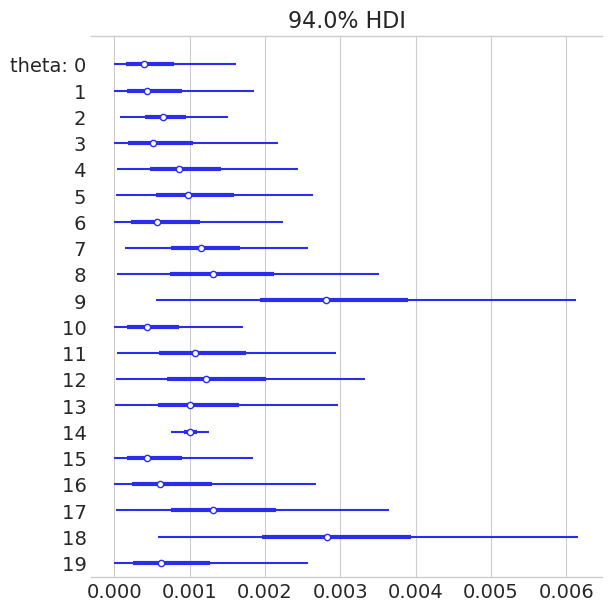

In [11]:
az.plot_forest(trace_h, var_names=["theta"], combined=True)